In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to C:\Users\MOHAN PRAVEEN
[nltk_data]     K\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
data = pd.read_csv('Movie_Review.csv')

In [6]:
data.dropna(inplace=True)
#dropping duplicate records

In [7]:
#cleaning data
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [10]:
data['text'] = data['text'].apply(clean_review)

In [11]:
#wordcloud 

from wordcloud import WordCloud

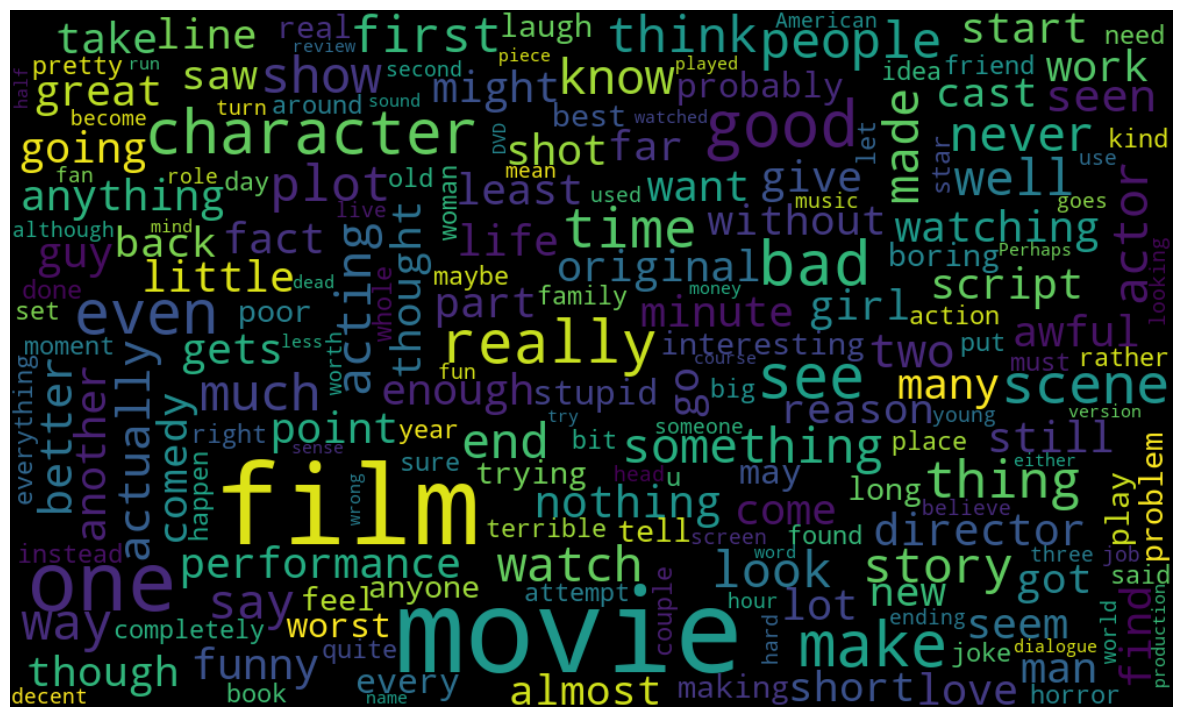

In [12]:
#draw Wordcloud
#words in negative reviews 
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

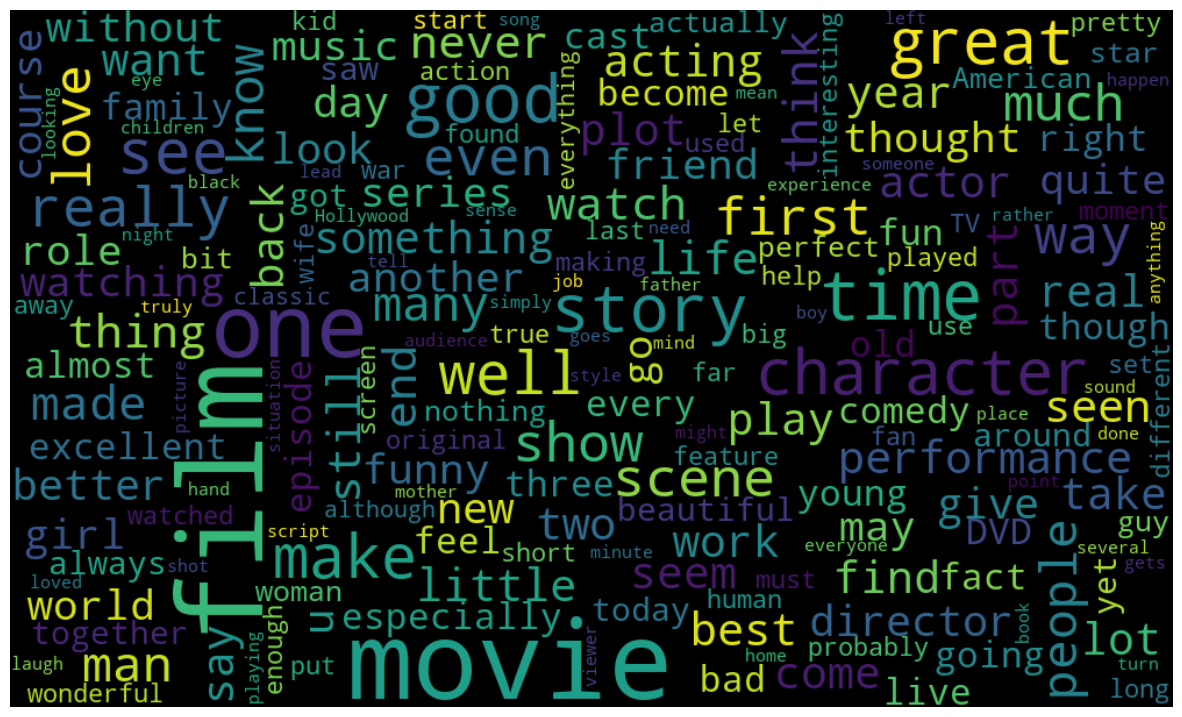

In [13]:
#draw Wordcloud
#words in positive reviews 
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
#convert text data's into numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [16]:
reviews = cv.fit_transform(data['text']).toarray()

In [18]:
#convert postive reviews to 0 and negative to 1
data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])


In [19]:
data['sentiment'].value_counts()

sentiment
0    500
1    500
Name: count, dtype: int64

In [20]:
#data is ready
#creating a model 

from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [24]:
#feeding data into the model

model.fit(reviews_train,sent_train)


LogisticRegression()

In [25]:
predict = model.predict(reviews_test)

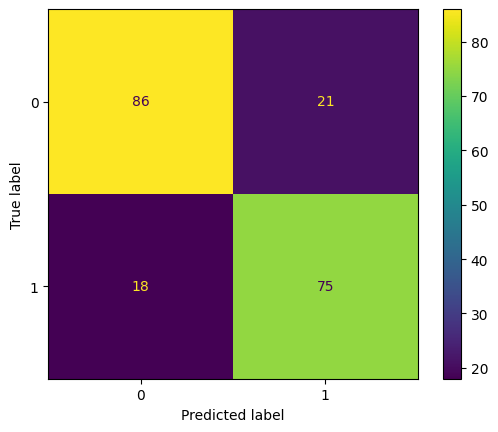

In [26]:
# draw confusion matrix for find the accuracy of the data

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()


In [27]:
#exporting it and creating a web app
import pickle as pk

In [28]:
pk.dump(model,open('model.pkl','wb'))

In [29]:
pk.dump(cv,open('scaler.pkl','wb'))